In [10]:
from numpy.random import seed
seed(42)

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor


In [11]:
import os;
p = r"C:\Users\JOSH\Desktop"
os.chdir(p)
os.getcwd()

'C:\\Users\\JOSH\\Desktop'

In [12]:
data = pd.read_csv(r"C:\Users\JOSH\Downloads\weatherHistory.csv", header=None)
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header
data.drop(['Formatted Date','Summary','Precip Type','Apparent Temperature (C)','Pressure (millibars)','Daily Summary','Loud Cover','Wind Bearing (degrees)','Visibility (km)'], axis=1, inplace=True)
data = data.astype(float)
data




,Temperature (C),Humidity,Wind Speed (km/h)
1,9.472222,0.89,14.1197
2,9.355556,0.86,14.2646
3,9.377778,0.89,3.9284
4,8.288889,0.83,14.1036
5,8.755556,0.83,11.0446
...,...,...,...
96449,26.016667,0.43,10.9963
96450,24.583333,0.48,10.0947
96451,22.038889,0.56,8.9838
96452,21.522222,0.60,10.5294


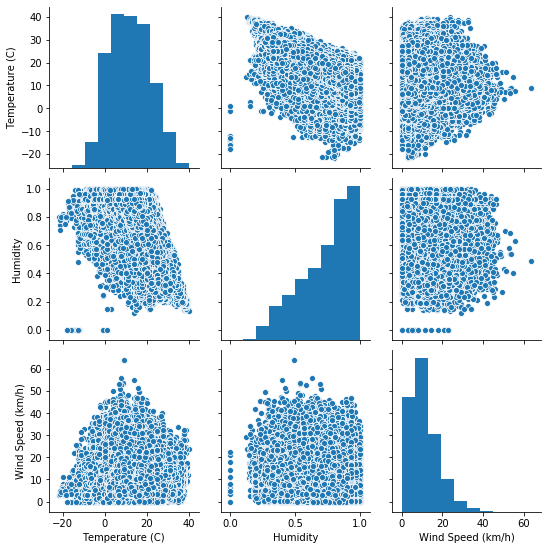

In [13]:
sns.pairplot(data)

In [14]:
X=data[['Humidity','Wind Speed (km/h)']]
y=data['Temperature (C)']

In [15]:
#X = np.array(y).reshape((-1,1))
y = np.array(y).reshape((-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)


MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [16]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [17]:
model = Sequential()
model.add(Dense(16, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 6,92

In [18]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)

Train on 57871 samples, validate on 14468 samples
Epoch 1/100
57871/57871 [==============================] - 4s 63us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - mean_absolute_error: 0.1084 - val_loss: 0.0138 - val_mean_squared_error: 0.0138 - val_mean_absolute_error: 0.0963
Epoch 2/100
57871/57871 [==============================] - 3s 54us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0960 - val_loss: 0.0137 - val_mean_squared_error: 0.0137 - val_mean_absolute_error: 0.0953
Epoch 3/100
57871/57871 [==============================] - 3s 52us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - mean_absolute_error: 0.0958 - val_loss: 0.0138 - val_mean_squared_error: 0.0138 - val_mean_absolute_error: 0.0949
Epoch 4/100
57871/57871 [==============================] - 3s 54us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - mean_absolute_error: 0.0956 - val_loss: 0.0137 - val_mean_squared_error: 0.0137 - val_mean_absolute_error: 0.0957
Epoch 5/100
57

In [21]:
from keras.models import Sequential
accuracy = model.evaluate(X_train, y_train, verbose=1)

72339/72339 [==============================] - 2s 34us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - mean_absolute_error: 0.0945


dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


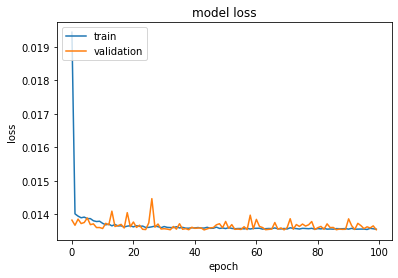

In [22]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
Xn = data[['Humidity','Wind Speed (km/h)']]
Xnew = Xn[20:40]
Yn = data[['Temperature (C)']]
Yactual = Yn[20:40]

print(Xn)

0      Humidity  Wind Speed (km/h)
1          0.89            14.1197
2          0.86            14.2646
3          0.89             3.9284
4          0.83            14.1036
5          0.83            11.0446
...         ...                ...
96449      0.43            10.9963
96450      0.48            10.0947
96451      0.56             8.9838
96452      0.60            10.5294
96453      0.61             5.8765

[96453 rows x 2 columns]


In [24]:
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)

ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print([Yactual, ynew])


[0   Temperature (C)
21        11.550000
22        11.183333
23        10.116667
24        10.200000
25        10.422222
26         9.911111
27        11.183333
28         7.155556
29         6.111111
30         6.788889
31         7.261111
32         7.800000
33         9.872222
34        12.222222
35        15.094444
36        17.355556
37        19.005556
38        20.044444
39        21.050000
40        21.183333, array([[11.22071  ],
       [11.822692 ],
       [10.664943 ],
       [11.500779 ],
       [14.147526 ],
       [12.511719 ],
       [ 8.992294 ],
       [ 9.3048   ],
       [ 9.490018 ],
       [ 7.5803885],
       [ 7.4962955],
       [ 7.6088386],
       [ 8.875412 ],
       [10.646575 ],
       [14.3660555],
       [16.288166 ],
       [18.301973 ],
       [18.981922 ],
       [19.449244 ],
       [20.78435  ]], dtype=float32)]
